In [1]:
import firefin

In [2]:
# get data
data = firefin.fetch_data(["open", "close", "volume"])
open_price = data["open"]

/home/baochen/fire/firefin/data/gateway.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(obj)
/home/baochen/fire/firefin/data/gateway.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(obj)


In [3]:

def pv_corr(close, volume):
    # price volume correlation
    return close.rolling(20).corr(volume)


factor = pv_corr(data["close"], data["volume"])


In [5]:
# compute forward returns
fr = firefin.compute_forward_returns(open_price.shift(-1), [1, 5, 10])

/home/baochen/miniconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/home/baochen/miniconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/home/baochen/miniconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


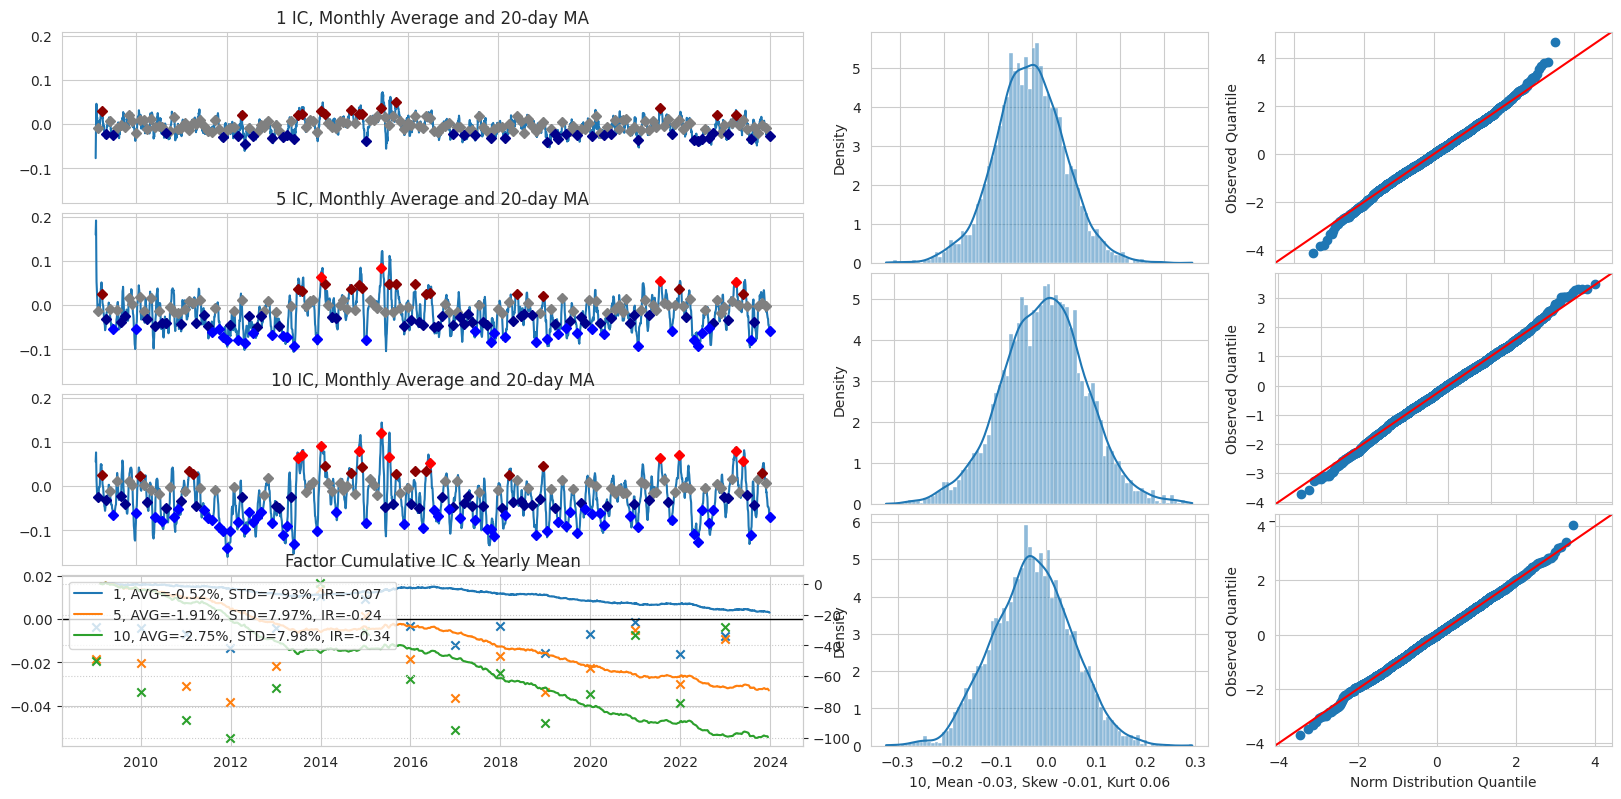

             1         5         10
mean  -0.005169 -0.019099 -0.027515
std    0.079307  0.079704  0.079773
ir    -0.065179 -0.239623 -0.344921
> 0    0.474062  0.410773  0.366528
< 0    0.525938  0.589227  0.633472
> 3%   0.324227  0.261878  0.234025
< -3%  0.375828  0.437845  0.488797
> 5%   0.235651  0.183149  0.167082
< -5%  0.275662  0.350276  0.379530


In [ ]:

# evaluate factor
mng = firefin.Evaluator(factor, fr)
mng.get_ic("pearson")
mng.get_quantile_returns(5)